In [1]:
from stuff import run_simulation, users, times_of_day, get_cost, plot_ctr
import vowpalwabbit

shared |User user=Tom time_of_day=morning
|Action article=politics 
|Action article=sports 
|Action article=music 
|Action article=food 


/home/allen/projects/context_bandits/stuff.py:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda r: cost_fun({"user": r[0], "time_of_day": r[1]}, r[2]), axis=1


shared |User user=Anna time_of_day=morning
|Action article=politics 
|Action article=sports 
0:0.0:0.25 |Action article=music 
|Action article=food 
shared |User user=Tom time_of_day=afternoon
0:0.0:0.25 |Action article=politics 
|Action article=sports 
|Action article=music 
|Action article=food 
shared |User user=Tom time_of_day=afternoon
0:0.0:0.25 |Action article=politics 
|Action article=sports 
|Action article=music 
|Action article=food 
shared |User user=Anna time_of_day=morning
|Action article=politics 
0:-1.0:0.25 |Action article=sports 
|Action article=music 
|Action article=food 
shared |User user=Anna time_of_day=morning
|Action article=politics 
0:-1.0:0.8500000016763806 |Action article=sports 
|Action article=music 
|Action article=food 
shared |User user=Anna time_of_day=afternoon
|Action article=politics 
0:0.0:0.8500000016763806 |Action article=sports 
|Action article=music 
|Action article=food 
shared |User user=Anna time_of_day=morning
|Action article=politics 
0:-

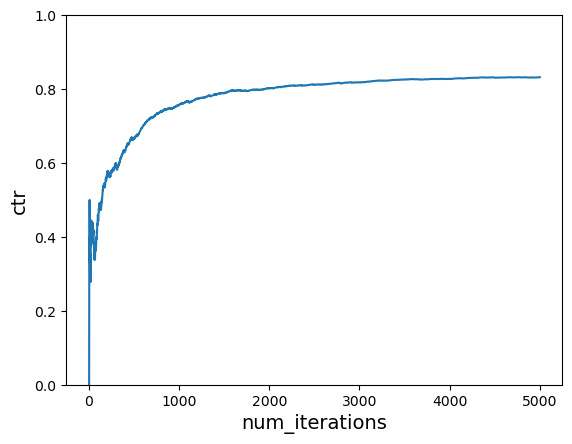

In [2]:
context = {"user": "Tom", "time_of_day": "morning"}
actions = ["politics", "sports", "music", "food"]

vw = vowpalwabbit.Workspace("--cb_explore_adf -q UA --epsilon 0.2", enable_logging=True)

num_iterations = 5000
ctr = run_simulation(vw, num_iterations, users, times_of_day, actions, get_cost)

plot_ctr(num_iterations, ctr)
print(vw.get_log())

In [3]:
vw.finish()
vw.get_log()

['creating quadratic features for pairs: UA',
 'using no cache',
 'Reading datafile = none',
 'num sources = 0',
 'Num weight bits = 18',
 'learning rate = 0.5',
 'initial_t = 0',
 'power_t = 0.5',
 'cb_type = mtr',
 'Enabled learners: gd, scorer-identity, csoaa_ldf-rank, cb_adf, cb_explore_adf_greedy, shared_feature_merger',
 'Input label = CB',
 'Output pred = ACTION_PROBS',
 'average  since         example        example        current        current  current',
 'loss     last          counter         weight          label        predict features',
 'n.a.     n.a.                1            1.0        unknown         0:0.25       24',
 'n.a.     n.a.                2            2.0        unknown         0:0.25       24',
 'n.a.     n.a.                4            4.0        unknown         0:0.25       24',
 'n.a.     n.a.                8            8.0        unknown         1:0.85       24',
 'n.a.     n.a.               16           16.0        unknown         1:0.85       24